# 5. Frequency Domain

## Table of Contents
1. [Libraries](#libraries)
2. [Fast Fourier Transform (FFT)](#fft)
3. [Low Pass Filter](#low)
4. [High Pass Filter](#high)

## Importing Libraries <a class="anchor" id="libraries" ></a>

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

## Fast Fourier Transform (FFT) <a class="anchor" id="fft" ></a>

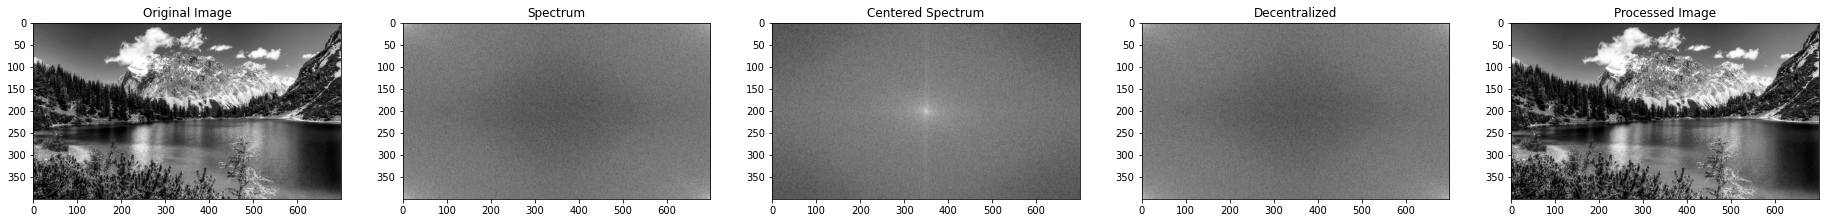

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(151), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(152), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(153), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

inv_center = np.fft.ifftshift(center)
plt.subplot(154), plt.imshow(np.log(1+np.abs(inv_center)), "gray"), plt.title("Decentralized")

processed_img = np.fft.ifft2(inv_center)
plt.subplot(155), plt.imshow(np.abs(processed_img), "gray"), plt.title("Processed Image")

plt.show()

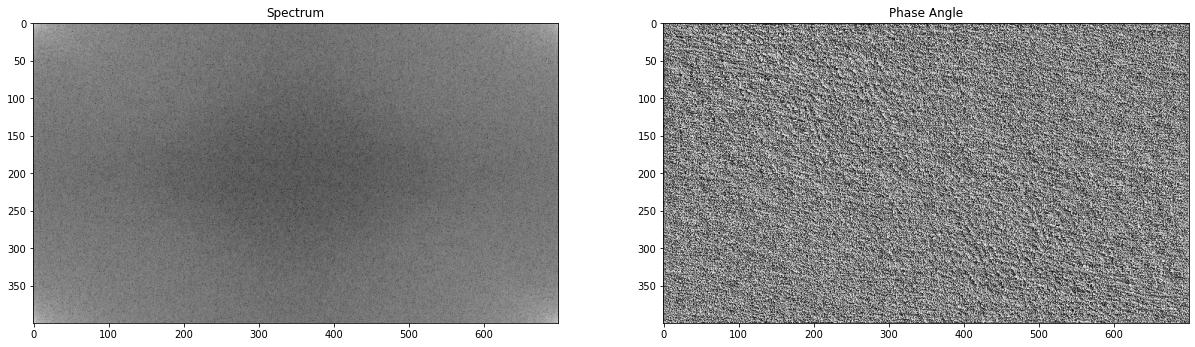

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)

original = np.fft.fft2(img)
plt.subplot(131), plt.imshow(np.log(np.abs(original)), "gray"), plt.title("Spectrum")

plt.subplot(132), plt.imshow(np.angle(original), "gray"), plt.title("Phase Angle")
plt.show()

In [10]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

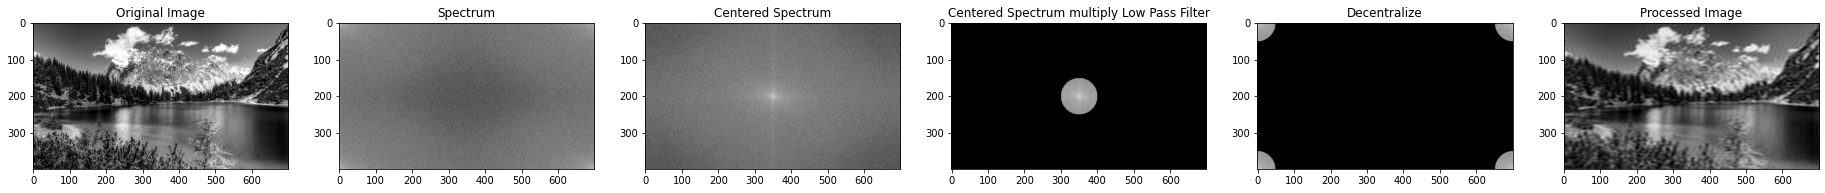

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

img = cv2.imread("data/image.jpg", 0)
plt.subplot(161), plt.imshow(img, "gray"), plt.title("Original Image")

original = np.fft.fft2(img)
plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("Spectrum")

center = np.fft.fftshift(original)
plt.subplot(163), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Centered Spectrum")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(165), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(166), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## Low Pass Filter <a class="anchor" id="low" ></a>

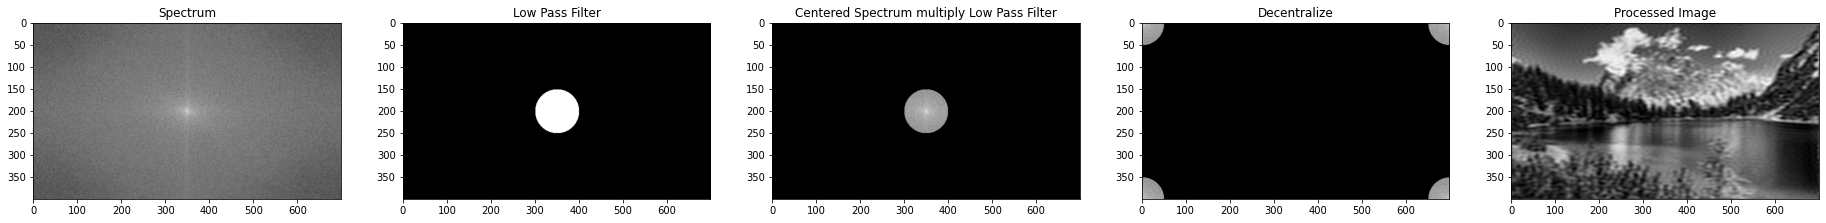

In [ ]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

LowPass = idealFilterLP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(LowPass), "gray"), plt.title("Low Pass Filter")

LowPassCenter = center * idealFilterLP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(LowPassCenter)), "gray"), plt.title("Centered Spectrum multiply Low Pass Filter")

LowPass = np.fft.ifftshift(LowPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(LowPass)), "gray"), plt.title("Decentralize")

inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(155), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Processed Image")

plt.show()

## High Pass Filter <a class="anchor" id="high" ></a>

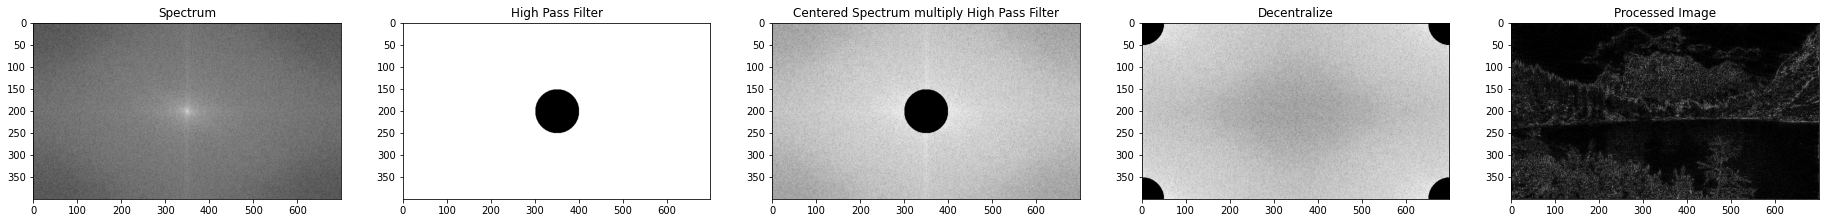

In [ ]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(151), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(152), plt.imshow(np.abs(HighPass), "gray"), plt.title("High Pass Filter")

HighPassCenter = center * idealFilterHP(50,img.shape)
plt.subplot(153), plt.imshow(np.log(1+np.abs(HighPassCenter)), "gray"), plt.title("Centered Spectrum multiply High Pass Filter")

HighPass = np.fft.ifftshift(HighPassCenter)
plt.subplot(154), plt.imshow(np.log(1+np.abs(HighPass)), "gray"), plt.title("Decentralize")

inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(155), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Processed Image")

plt.show()

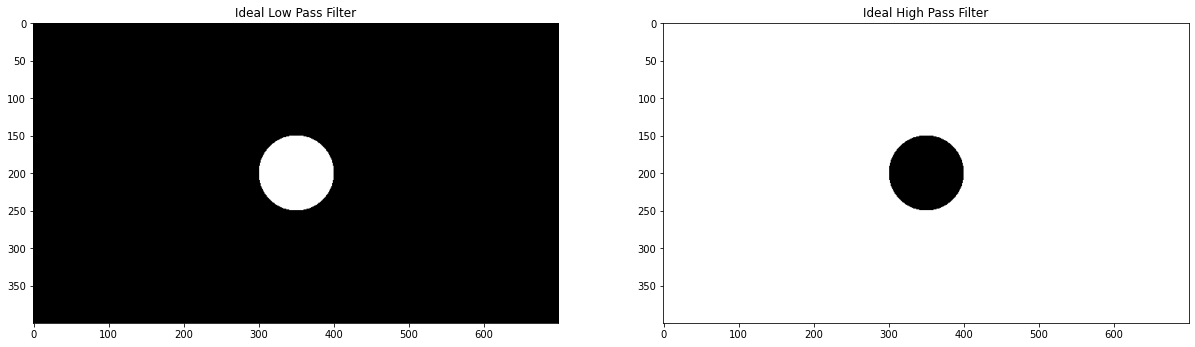

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Ideal Low Pass Filter")

HighPass = idealFilterHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Ideal High Pass Filter")

plt.show()

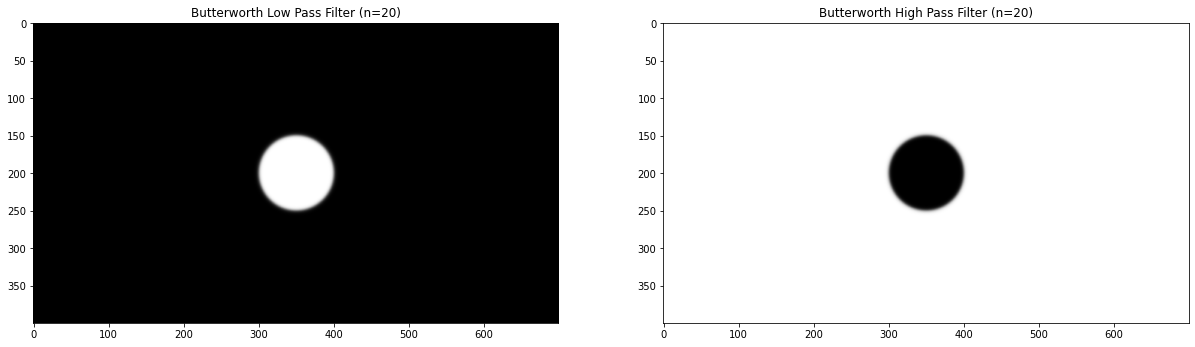

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,20)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=20)")

HighPass = butterworthHP(50,img.shape,20)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=20)")

plt.show()

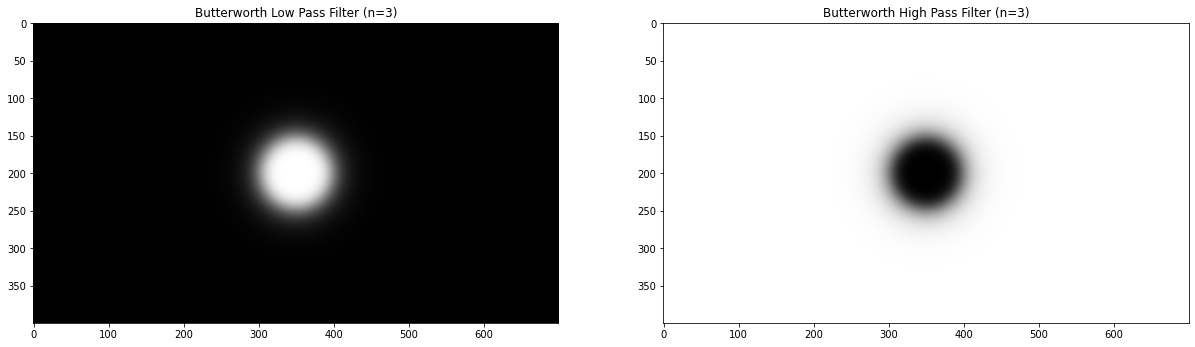

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = butterworthLP(50,img.shape,3)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Butterworth Low Pass Filter (n=3)")

HighPass = butterworthHP(50,img.shape,3)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Butterworth High Pass Filter (n=3)")

plt.show()

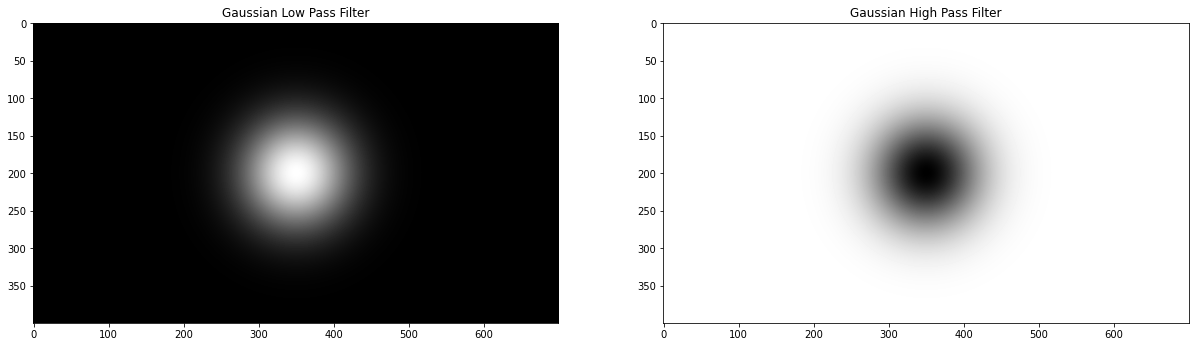

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPass = gaussianLP(50,img.shape)
plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("Gaussian Low Pass Filter")

HighPass = gaussianHP(50,img.shape)
plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

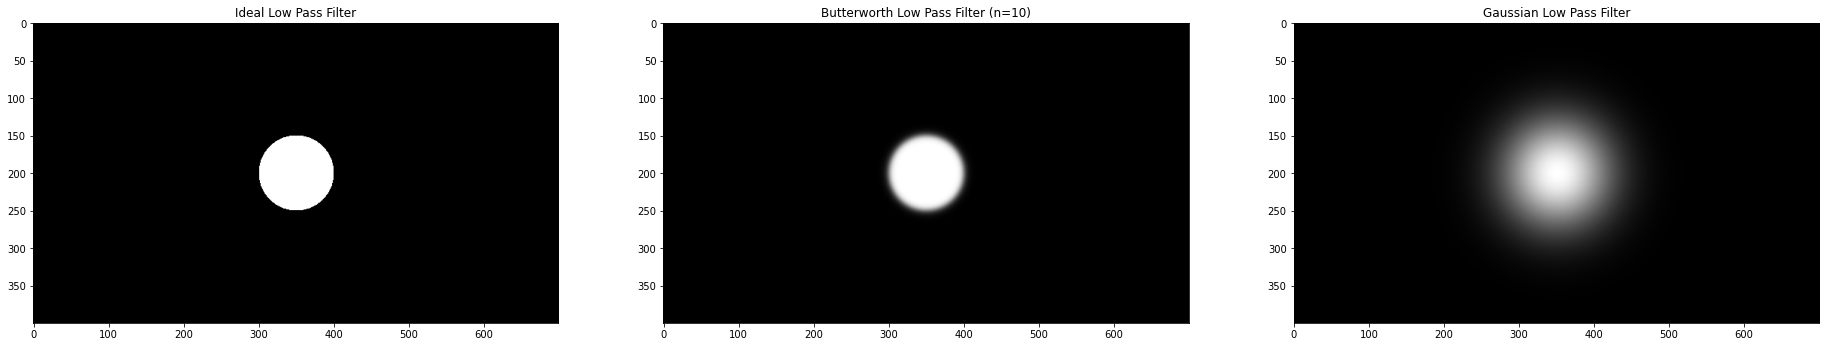

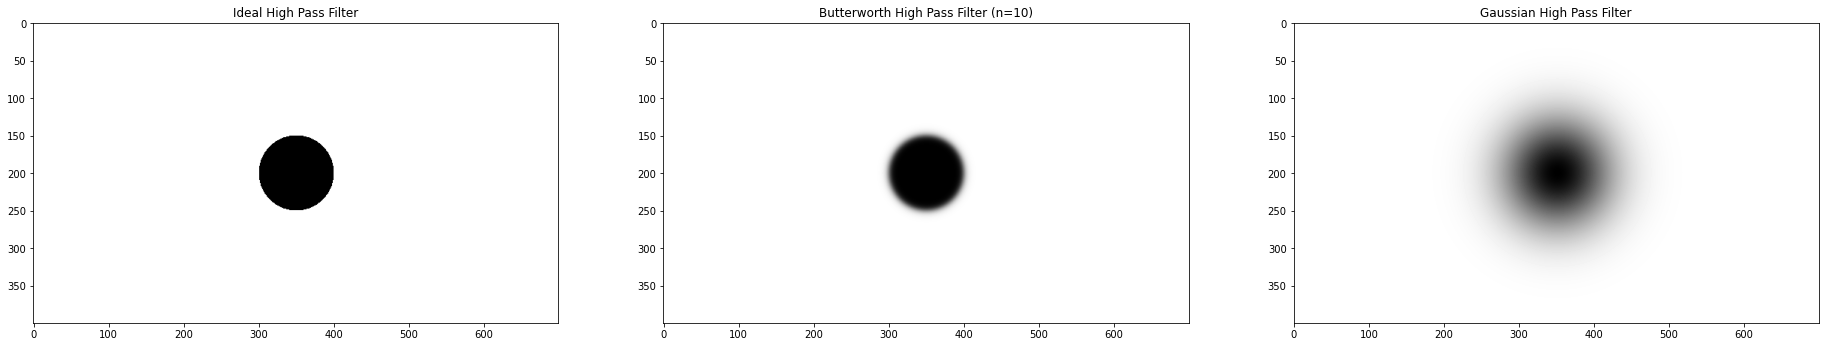

In [ ]:
plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

IdealLP = idealFilterLP(50,img.shape)
plt.subplot(131), plt.imshow(IdealLP, "gray"), plt.title("Ideal Low Pass Filter")

ButterLP = butterworthLP(50,img.shape,10)
plt.subplot(132), plt.imshow(ButterLP, "gray"), plt.title("Butterworth Low Pass Filter (n=10)")

GaussianLP = gaussianLP(50,img.shape)
plt.subplot(133), plt.imshow(GaussianLP, "gray"), plt.title("Gaussian Low Pass Filter")

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
IdealHP = idealFilterHP(50,img.shape)
plt.subplot(231), plt.imshow(IdealHP, "gray"), plt.title("Ideal High Pass Filter")

ButterHP = butterworthHP(50,img.shape,10)
plt.subplot(232), plt.imshow(ButterHP, "gray"), plt.title("Butterworth High Pass Filter (n=10)")

GaussianHP = gaussianHP(50,img.shape)
plt.subplot(233), plt.imshow(GaussianHP, "gray"), plt.title("Gaussian High Pass Filter")

plt.show()

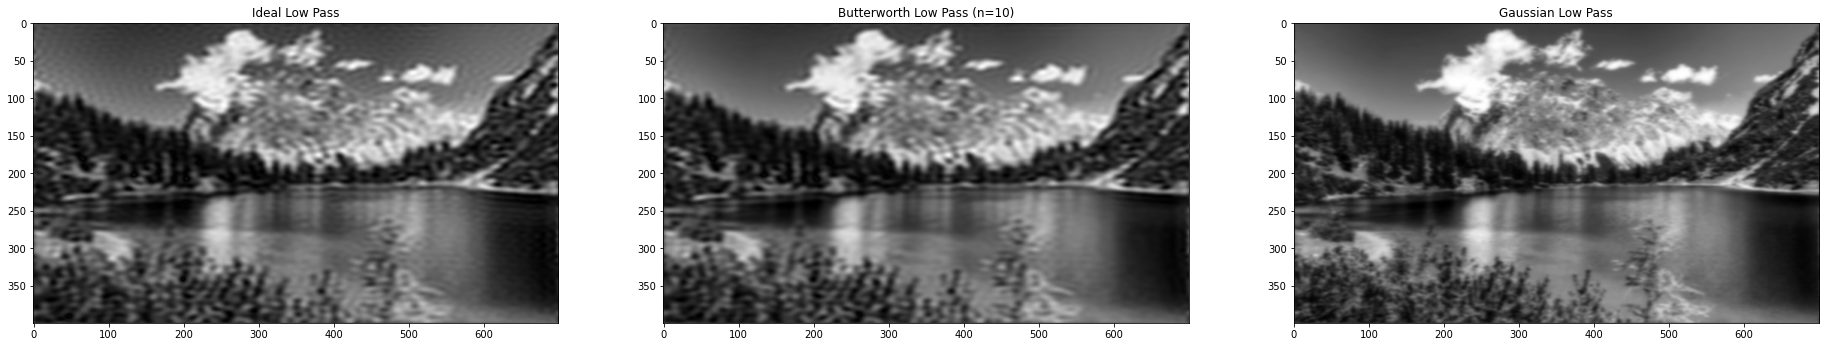

In [ ]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

LowPassCenter = center * idealFilterLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(131), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Ideal Low Pass")

LowPassCenter = center * butterworthLP(50,img.shape,10)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Butterworth Low Pass (n=10)")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(133), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

plt.show()

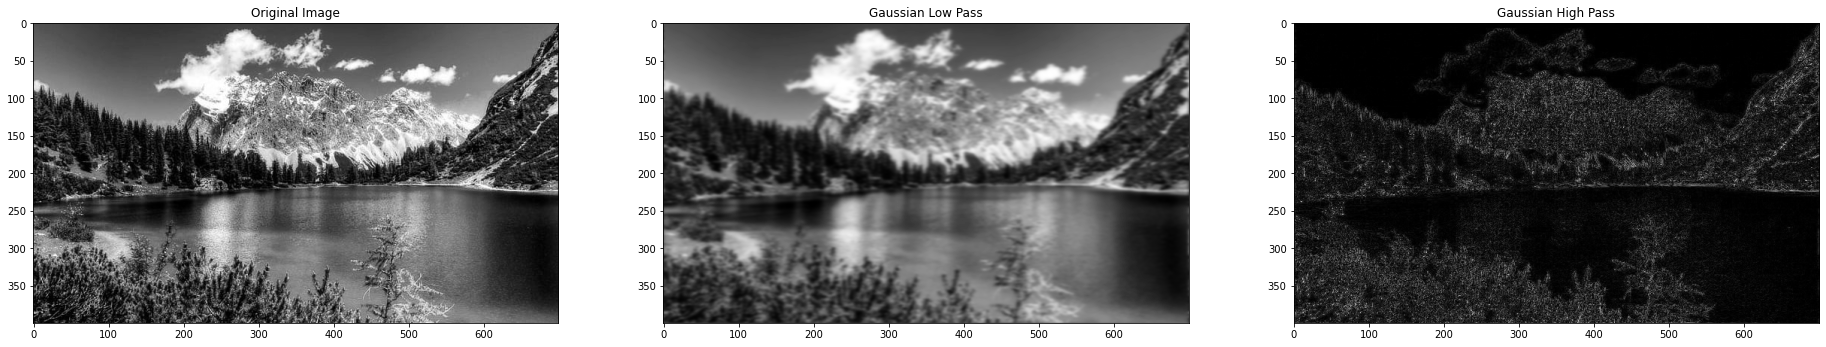

In [ ]:
img = cv2.imread("data/image.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")

plt.show()

# Ejercicios

## Utilitary code

In [12]:
# importing libraries
from PIL import Image, ImageOps
from io import BytesIO
import numpy as np
import requests

In [20]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def butterworthLP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def butterworthHP(D0,imgShape,n):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1-1/(1+(distance((y,x),center)/D0)**(2*n))
    return base

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

In [2]:
def getImageByUrl(url: str) -> Image:
  """
    gets the image in the given url

    Parameters
      url (str): URL where the image is located
    Returns
      Image: image retrieved from the given url
    raises
      ValueError if no url is provided
  """
  if url == None:
      raise ValueError('url is required and cannot be None')
  response = requests.get(url);
  img = Image.open(BytesIO(response.content))
  return img

In [3]:
def saltAndPepper(image: Image, prob: float = 0.05) -> Image:
    """
      applies salt and pepper noise to the given image

      Parameters
        image (Image): image that will ge the salt-and-pepper noise
        prob 
      Returns
        Image: modified image
    """

    # If the specified `prob` is negative or zero, we don't need to do anything.
    if prob <= 0:
        return image

    arr = np.asarray(image)
    original_dtype = arr.dtype

    # Derive the number of intensity levels from the array datatype.
    intensity_levels = 2 ** (arr[0, 0].nbytes * 8)

    min_intensity = 0
    max_intensity = intensity_levels - 1

    # Generate an array with the same shape as the image's:
    # Each entry will have:
    # 1 with probability: 1 - prob
    # 0 or np.nan (50% each) with probability: prob
    random_image_arr = np.random.choice(
        [min_intensity, 1, np.nan], p=[prob / 2, 1 - prob, prob / 2], size=arr.shape
    )

    # This results in an image array with the following properties:
    # - With probability 1 - prob: the pixel KEEPS ITS VALUE (it was multiplied by 1)
    # - With probability prob/2: the pixel has value zero (it was multiplied by 0)
    # - With probability prob/2: the pixel has value np.nan (it was multiplied by np.nan)
    # We need to to `arr.astype(np.float)` to make sure np.nan is a valid value.
    salt_and_peppered_arr = arr.astype(np.float) * random_image_arr

    # Since we want SALT instead of NaN, we replace it.
    # We cast the array back to its original dtype so we can pass it to PIL.
    salt_and_peppered_arr = np.nan_to_num(
        salt_and_peppered_arr, nan=max_intensity
    ).astype(original_dtype)

    return Image.fromarray(salt_and_peppered_arr)

In [4]:
def plot(items:list):
  """
    Display the given images side by side

    Parameters
      ----------
      items (list): list of tuples (image:np.array, title:str)
  """
  size = len(items)
  _, ax = plt.subplots(1, size, figsize=(20, 20))

  for i in range(size):
    ax[i].imshow(items[i][0], cmap='gray')
    ax[i].set_title(items[i][1])
    ax[i].axis('off')

In [5]:
# define image to work with
TARGET_IMAGE_URL = 'https://raw.githubusercontent.com/jorgetapia-ml/Actividades-Visualizacion-eq17/develop/images/chess.jpeg'

In [6]:
# get image
targetImage = getImageByUrl(TARGET_IMAGE_URL)

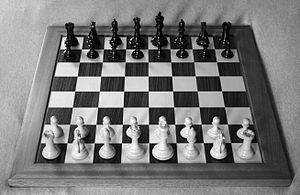

In [7]:
# display image as graysapce
grayScaledTargetImage = targetImage.convert('L')
# display image
grayScaledTargetImage

## Aplicación Fourier Low Pass

Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasabajas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

### Low Pass Fourier

Desde la perspectiva de procesamiento de images, Low Pass Foutier tiene como principal aplicación el suavido de imagenes (_blurring_ o _smoothing_). La aplicación de este tipo de filtro permite reducir el ruido que una imagen pueda tener.

In [13]:
def lpf(img: Image, filter: callable, filterParams : list)-> np.array:
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)
  LowPassCenter = center * filter(*filterParams)
  LowPass = np.fft.ifftshift(LowPassCenter)
  return np.abs(np.fft.ifft2(LowPass))

### Reducción de ruido

<ipython-input-3-c1dc37425113>:38: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  salt_and_peppered_arr = arr.astype(np.float) * random_image_arr


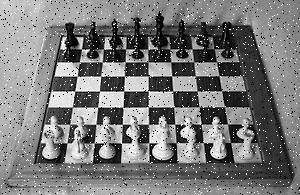

In [14]:
# applies noise to target image
noisedImage = saltAndPepper(grayScaledTargetImage)
noisedImage

In [15]:
# defining constant
TARGET_IMAGE_SHAPE = np.array(noisedImage).shape
D_ZERO = 40

### Reducción de ruido - ILPF

In [16]:
# Applis ideal low pass filter
ilpfImage = lpf(noisedImage, idealFilterLP, [D_ZERO, TARGET_IMAGE_SHAPE])

### Reducción de ruido - BLPF

In [17]:
# Applis butterworth low pass filter
blpfImage = lpf(noisedImage, butterworthLP, [D_ZERO, TARGET_IMAGE_SHAPE, 2])

### Reducción de ruido - GLPF

In [18]:
# Applis gaussian low pass filter
blpfImage = lpf(noisedImage, gaussianLP, [D_ZERO, TARGET_IMAGE_SHAPE])

### Ploting results

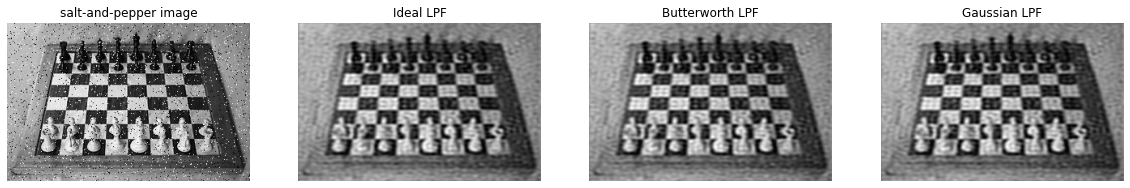

In [19]:
plot([
  (noisedImage, 'salt-and-pepper image'),
  (ilpfImage,  'Ideal LPF'),
  (ilpfImage,  'Butterworth LPF'),
  (ilpfImage,  'Gaussian LPF')
])

## Aplicación Fourier High Pass

Investigar una aplicación de mejoramiento de imágenes usando transformada de Fourier usando filtro pasa altas. Realizar una demo sencilla en Google collab. De preferencia probar los tres tipo de filtros básicos (Ideal, el Butterworth y el Gaussian,)

El filtro de pasa altas en la transformada de Fourier se utiliza para eliminar las frecuencias bajas (ruido) de una imagen y destacar las frecuencias altas (detalles). Es una técnica común en procesamiento de imágenes y se utiliza en aplicaciones como la eliminación de ruido, la mejora de la claridad y la detección de bordes.

Después de aplicar el filtro de pasa altas, la imagen se transforma de nuevo al dominio espacial y los detalles altos se destacan en la imagen resultante. Este proceso se conoce como filtrado en el dominio frecuencial y es una técnica efectiva para mejorar la claridad y la resolución de imágenes.



In [157]:
def hpf(img: Image, filter_img: callable, filterParams = []):
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)
  HighPassCenter = center * filter_img( * filterParams)
  HighPass = np.fft.ifftshift(HighPassCenter)
  inverse_HighPass = np.fft.ifft2(HighPass)
  return np.abs(inverse_HighPass)

In [158]:
url = "https://images.unsplash.com/photo-1446941611757-91d2c3bd3d45?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1004&q=80"
img_sample = getImageByUrl(url).convert("L")
img_sample_array = np.array(img_sample)


In [162]:
D0 = 40

In [163]:
l = [(img_sample_array,"original")]
for filter in [ idealFilterHP, butterworthHP, gaussianHP]:
  name = str(filter.__name__)
  if name == "butterworthHP":
    img_transform = hpf(img_sample_array, filter, [D0, img_sample_array.shape, 4]).copy()
  else:
    img_transform = hpf(img_sample_array, filter, [D0, img_sample_array.shape]).copy()
  l.append((img_transform, str(name)))

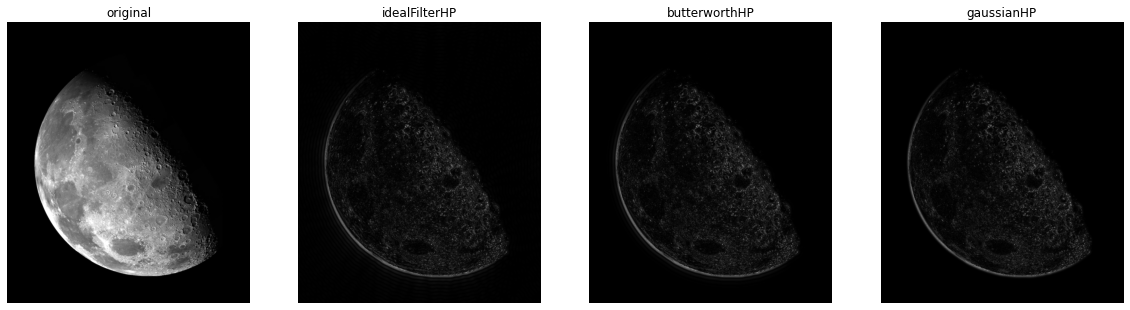

In [164]:
plot(l)

## Referencias

* Mathlab. (n.d.). Matlab Tutorial : Digital Image Processing 6 - Smoothing : Low pass filter - 2020. BogoToBogo. Retrieved February 11, 2023, from https://www.bogotobogo.com/Matlab/Matlab_Tutorial_Digital_Image_Processing_6_Filter_Smoothing_Low_Pass_fspecial_filter2.php